In [ ]:
# Gerekli kütüphaneler içe aktarılıyor
import pandas as pd  # Veri analizi ve veri çerçevesi işlemleri için
import numpy as np  # Sayısal işlemler ve diziler için
import matplotlib.pyplot as plt  # Grafik çizimleri için temel kütüphane
import seaborn as sns  # İleri düzey ve estetik grafikler için (matplotlib tabanlı)
import warnings  # Uyarıları kontrol etmek için kullanılır
warnings.filterwarnings('ignore')  # Ekranda çıkabilecek uyarı mesajlarını gizler

# Veri setinin yolu tanımlanıyor
file_path = './scraped_data/final_cleaned_dataset.csv'

# CSV dosyasından veri seti pandas veri çerçevesi (DataFrame) olarak yükleniyor
df = pd.read_csv(file_path)

# Veri setinin satır ve sütun sayısını ekrana yazdırıyor
print(f"Dataset shape: {df.shape}")  # Örn: (1000, 15) -> 1000 satır, 15 sütun

# İlk 5 satırı görüntüleyerek veri yapısı hakkında genel bilgi veriliyor
df.head()


Dataset shape: (15165, 25)


,seller_name,mileage,year,vehicle_condition,ad_date,fuel_tank,drive_type,fuel_consumption,series,paint_replaced,...,color,body_type,model,fuel_type,ad_url,seller_type,ad_id,location_2,engine_power,ad_price
0,FARUK G.,3000000.0,2004.0,İkinci El,25 Aralık 2024,63.0,Önden Çekiş,Unspecified,156,"1 değişen, 12 boyalı",...,Gri (Gümüş),Sedan,1.6 TS Distinctive,LPG & Benzin,https://www.arabam.com/ilan/sahibinden-satilik...,Sahibinden,27458049.0,Mersin,120.0,410000.0
1,MURAT K.,3520000.0,1999.0,İkinci El,25 Aralık 2024,63.0,Önden Çekiş,Unspecified,156,Tamamı boyalı,...,Gri,Sedan,2.0 TS,LPG & Benzin,https://www.arabam.com/ilan/sahibinden-satilik...,Sahibinden,23613767.0,Samsun,155.0,340750.0
2,CEMİL OKKAN D.,1850000.0,2011.0,İkinci El,25 Aralık 2024,60.0,Önden Çekiş,Unspecified,Giulietta,Tamamı orjinal,...,Beyaz,Hatchback/5,1.6 JTD Progression Plus,Dizel,https://www.arabam.com/ilan/sahibinden-satilik...,Sahibinden,27458725.0,Antalya,105.0,650000.0
3,Derin Oto Nazilli,999990.0,2017.0,İkinci El,25 Aralık 2024,60.0,Önden Çekiş,Unspecified,Giulietta,Belirtilmemiş,...,Altın,Hatchback/5,1.6 JTD Distinctive,Dizel,https://www.arabam.com/ilan/galeriden-satilik-...,Galeriden,27457620.0,Aydın,105.0,99999999.0
4,ŞAZİYE T.,1700000.0,2014.0,İkinci El,25 Aralık 2024,60.0,Önden Çekiş,Unspecified,Giulietta,1 boyalı,...,Kırmızı,Hatchback/5,1.6 JTD Distinctive,Dizel,https://www.arabam.com/ilan/sahibinden-satilik...,Sahibinden,26824239.0,Adana,105.0,715000.0


In [ ]:
# Veri Keşfi (Exploratory Data Analysis - EDA)

# Sütunlardaki veri tiplerini yazdırıyoruz
# Bu sayede hangi sütunun sayısal, hangi sütunun kategorik (metinsel) olduğunu görebiliriz
print("\nData Types:")
print(df.dtypes)

# Eksik (null) değerleri kontrol ediyoruz
# Her sütundaki eksik değerlerin sayısı hesaplanır ve yalnızca 0'dan fazla eksik değeri olan sütunlar gösterilir
print("\nMissing Values:")
missing_values = df.isnull().sum()  # Her sütundaki null (eksik) değerlerin toplamı
print(missing_values[missing_values > 0])  # Sadece eksik değeri olan sütunları yazdır

# Sayısal sütunların temel istatistiksel özetini görüntülüyoruz
# Örneğin: ortalama (mean), standart sapma (std), min–max değerleri vs.
print("\nStatistical Summary:")
df.describe()  # Sadece sayısal sütunlar için geçerlidir



Data Types:
seller_name           object
mileage              float64
year                 float64
vehicle_condition     object
ad_date               object
fuel_tank            float64
drive_type            object
fuel_consumption      object
series                object
paint_replaced        object
engine_capacity      float64
trade_in              object
transmission          object
location_1            object
brand                 object
color                 object
body_type             object
model                 object
fuel_type             object
ad_url                object
seller_type           object
ad_id                float64
location_2            object
engine_power         float64
ad_price             float64
dtype: object

Missing Values:
engine_capacity    278
dtype: int64

Statistical Summary:


,mileage,year,fuel_tank,engine_capacity,ad_id,engine_power,ad_price
count,1.516500e+04,15165.000000,15165.000000,1.488700e+04,1.516500e+04,15165.000000,1.516500e+04
mean,1.736378e+06,2011.976921,153.578107,1.872208e+07,2.697034e+07,136.374481,1.206299e+06
std,7.565045e+06,5.914385,190.678419,5.305954e+07,8.283769e+05,56.319896,5.585159e+06
min,0.000000e+00,1951.000000,35.000000,0.000000e+00,6.497138e+06,50.000000,3.750000e+04
25%,7.900000e+05,2010.000000,55.000000,1.199000e+03,2.696689e+07,101.000000,5.300000e+05
50%,1.600000e+06,2012.000000,60.000000,1.595000e+03,2.714956e+07,124.000000,8.750000e+05
75%,2.370000e+06,2015.000000,70.000000,1.984000e+03,2.728870e+07,165.000000,1.350000e+06
max,7.777778e+08,2024.000000,1000.000000,5.501600e+08,2.747794e+07,1500.000000,6.500000e+08


In [ ]:
# Veri Ön İşleme (Data Preprocessing)

# İlk olarak bazı önemli kategorik sütunlardaki benzersiz (unique) değer sayılarına bakıyoruz
# Bu bilgi, ileride kategorik değişkenleri sayısala çevirirken işimize yarayacak
print("Unique brands:", df['brand'].nunique())  # Kaç farklı marka var?
print("Unique models:", df['model'].nunique())  # Kaç farklı model var?
print("Unique fuel types:", df['fuel_type'].nunique())  # Kaç farklı yakıt tipi var?
print("Unique body types:", df['body_type'].nunique())  # Kaç farklı kasa tipi var?

# Hedef değişken olan ilan fiyatı (ad_price) sütununu sayısal veri tipine çeviriyoruz
# Eğer sayı değilse (örneğin boşluk, sembol vs. varsa), NaN (eksik) yapılacak
df['ad_price'] = pd.to_numeric(df['ad_price'], errors='coerce')

# Modelleme ve analiz için gerekli olan sütunlar seçiliyor
relevant_features = [
    'year',           # Araç üretim yılı
    'mileage',        # Kilometre bilgisi
    'engine_capacity',# Motor hacmi
    'engine_power',   # Motor gücü
    'fuel_tank',      # Yakıt deposu hacmi
    'model',          # Araç modeli
    'fuel_type',      # Yakıt türü
    'body_type',      # Araç tipi (sedan, hatchback vs.)
    'transmission',   # Vites türü
    'ad_price'        # Hedef değişken: ilan fiyatı
]

# Seçilen sütunlardan yeni bir veri çerçevesi oluşturuluyor
df_clean = df[relevant_features].copy()

# Temizlenmiş veri setindeki eksik değerler kontrol ediliyor
print("\nMissing values in cleaned dataset:")
print(df_clean.isnull().sum())

# Fiyat (ad_price) bilgisi eksik olan satırlar siliniyor
# Çünkü bu değer hedef değişken, tahmin edilmesi gereken değer olduğu için eksik olamaz
df_clean = df_clean.dropna(subset=['ad_price'])

# Sayısal sütunlardaki eksik değerler, o sütunun **medyan** değeri ile dolduruluyor
for col in ['year', 'mileage', 'engine_capacity', 'engine_power', 'fuel_tank']:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Kategorik (metinsel) sütunlardaki eksik değerler, o sütunun **en çok tekrar eden** değeri (mod) ile dolduruluyor
for col in ['model', 'fuel_type', 'body_type', 'transmission']:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# Temizleme işlemi sonrası eksik değer kalıp kalmadığı tekrar kontrol ediliyor
print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())

# Son durumda veri setinin satır ve sütun sayısı yazdırılıyor
print(f"\nDataset shape after cleaning: {df_clean.shape}")

# Temizlenmiş veri setinin ilk 5 satırı görüntüleniyor
df_clean.head()


Unique brands: 17
Unique models: 908
Unique fuel types: 10
Unique body types: 13

Missing values in cleaned dataset:
year                 0
mileage              0
engine_capacity    278
engine_power         0
fuel_tank            0
model                0
fuel_type            0
body_type            0
transmission         0
ad_price             0
dtype: int64



Missing values after cleaning:
year               0
mileage            0
engine_capacity    0
engine_power       0
fuel_tank          0
model              0
fuel_type          0
body_type          0
transmission       0
ad_price           0
dtype: int64

Dataset shape after cleaning: (15165, 10)


,year,mileage,engine_capacity,engine_power,fuel_tank,model,fuel_type,body_type,transmission,ad_price
0,2004.0,3000000.0,1598.0,120.0,63.0,1.6 TS Distinctive,LPG & Benzin,Sedan,Düz,410000.0
1,1999.0,3520000.0,1970.0,155.0,63.0,2.0 TS,LPG & Benzin,Sedan,Düz,340750.0
2,2011.0,1850000.0,1598.0,105.0,60.0,1.6 JTD Progression Plus,Dizel,Hatchback/5,Düz,650000.0
3,2017.0,999990.0,1598.0,105.0,60.0,1.6 JTD Distinctive,Dizel,Hatchback/5,Düz,99999999.0
4,2014.0,1700000.0,1598.0,105.0,60.0,1.6 JTD Distinctive,Dizel,Hatchback/5,Düz,715000.0


## Feature Engineering

In [ ]:
# Öznitelik Mühendisliği (Feature Engineering)

# Mevcut yıldan (2025) araç üretim yılını çıkararak araç yaşı hesaplanıyor
# Bu sayede model yılı yerine daha anlamlı bir özellik olan "araç yaşı" elde ediliyor
current_year = 2025
df_clean['car_age'] = current_year - df_clean['year']

# Araç model ismi içerisinden model serisi/numarası çıkartılıyor (örneğin "320i" -> 320)
# str.extract() fonksiyonu ile sayılar ayıklanıyor, örneğin "3.20i" → 3.20
df_clean['model_series'] = df_clean['model'].str.extract(r'(\d+\.\d+|\d+)', expand=False)

# Elde edilen model serisi sayıya çevriliyor (eğer sayı değilse NaN olacak)
df_clean['model_series'] = pd.to_numeric(df_clean['model_series'], errors='coerce')

# Kategorik sütunlar One-Hot Encoding ile sayısallaştırılıyor
# drop_first=True seçeneği ile ilk sınıf atılarak multicollinearity (çoklu doğrusal bağlantı) azaltılır
categorical_cols = ['model', 'fuel_type', 'body_type', 'transmission']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Bağımsız değişkenler (özellikler - X) ve bağımlı değişken (hedef - y) ayrılıyor
X = df_encoded.drop('ad_price', axis=1)  # ad_price: hedef değişken
y = df_encoded['ad_price']              # y: tahmin edilmek istenen fiyat

# Aykırı değerleri (outlier) tespit edip temizliyoruz
# IQR (Interquartile Range) yöntemi kullanılıyor
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR  # Alt sınır
upper_bound = Q3 + 1.5 * IQR  # Üst sınır

# Belirlenen aralık dışında kalan (çok düşük veya çok yüksek) fiyatlar filtreleniyor
outlier_mask = (y >= lower_bound) & (y <= upper_bound)
X_filtered = X[outlier_mask]
y_filtered = y[outlier_mask]

# Aykırı değer temizliği sonrası kalan veri sayısı yazdırılıyor
print(f"Original dataset: {X.shape[0]} records")  # İlk veri sayısı
print(f"After outlier removal: {X_filtered.shape[0]} records")  # Temizlenmiş veri sayısı

# Özelliklerin ölçü birimlerini eşitlemek için standardizasyon uygulanıyor
# Ortalama 0, standart sapma 1 olacak şekilde ölçekleniyor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Ölçeklenmiş veriyi tekrar pandas DataFrame'e çeviriyoruz
# Böylece model sonrası analizlerde kolon isimleri korunmuş olur
X_scaled_df = pd.DataFrame(X_scaled, columns=X_filtered.columns)

# İlk 5 satır gösterilerek ölçeklenmiş veri inceleniyor
X_scaled_df.head()


Original dataset: 15165 records
After outlier removal: 14225 records


,year,mileage,engine_capacity,engine_power,fuel_tank,car_age,model_series,model_0.8 SE,model_0.9 TCe Stepway,model_0.9 TCe Stepway Ambiance,...,body_type_Roadster,body_type_SUV,body_type_Sedan,body_type_Station wagon,body_type_Unknown,body_type_Unspecified,transmission_Otomatik,transmission_Unknown,transmission_Unspecified,transmission_Yarı Otomatik
0,-1.325514,0.152326,-0.330000,-0.229312,-0.480196,1.325514,-0.667385,-0.023721,-0.011858,-0.011858,...,-0.018751,-0.056958,1.070002,-0.087466,-0.517628,-0.048221,-0.831891,-0.517628,-0.022189,-0.288928
1,-2.206238,0.218962,-0.329992,0.665792,-0.480196,2.206238,-0.665250,-0.023721,-0.011858,-0.011858,...,-0.018751,-0.056958,1.070002,-0.087466,-0.517628,-0.048221,-0.831891,-0.517628,-0.022189,-0.288928
2,-0.092499,0.004958,-0.330000,-0.612928,-0.496198,0.092499,-0.667385,-0.023721,-0.011858,-0.011858,...,-0.018751,-0.056958,-0.934578,-0.087466,-0.517628,-0.048221,-0.831891,-0.517628,-0.022189,-0.288928
3,0.435935,-0.014264,-0.330000,-0.612928,-0.496198,-0.435935,-0.667385,-0.023721,-0.011858,-0.011858,...,-0.018751,-0.056958,-0.934578,-0.087466,-0.517628,-0.048221,-0.831891,-0.517628,-0.022189,-0.288928
4,0.083646,-0.028360,-0.330000,-0.612928,-0.496198,-0.083646,-0.667385,-0.023721,-0.011858,-0.011858,...,-0.018751,-0.056958,-0.934578,-0.087466,-0.517628,-0.048221,-0.831891,-0.517628,-0.022189,-0.288928


## Cross-Correlation & Important Features

Top 10 features by correlation with price:
ad_price                 1.000000
engine_power             0.569443
year                     0.559011
model_series             0.403240
transmission_Otomatik    0.364447
fuel_tank                0.227171
engine_capacity          0.191506
model_Unknown            0.190546
transmission_Unknown     0.190546
body_type_Unknown        0.190546
fuel_type_benzin         0.176086
Name: ad_price, dtype: float64


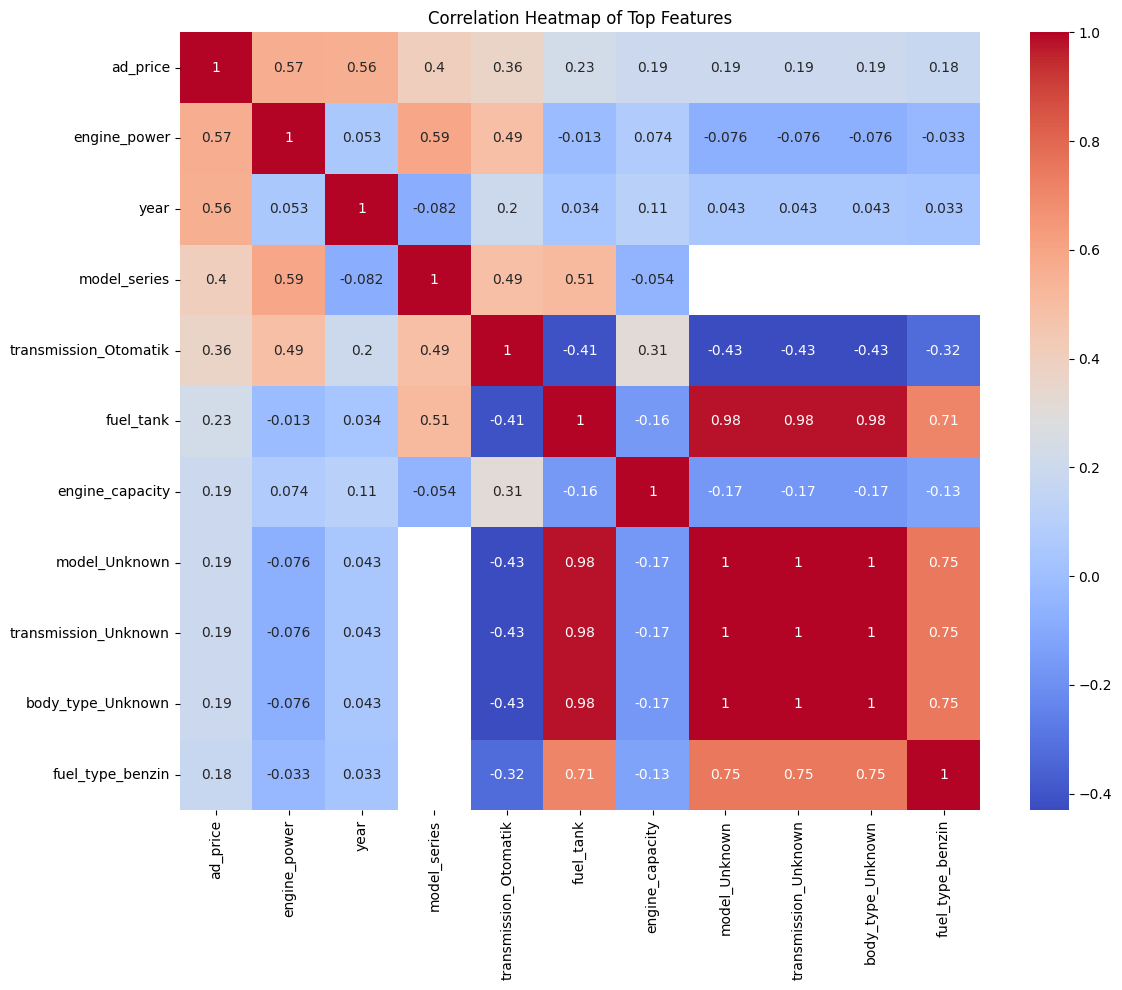

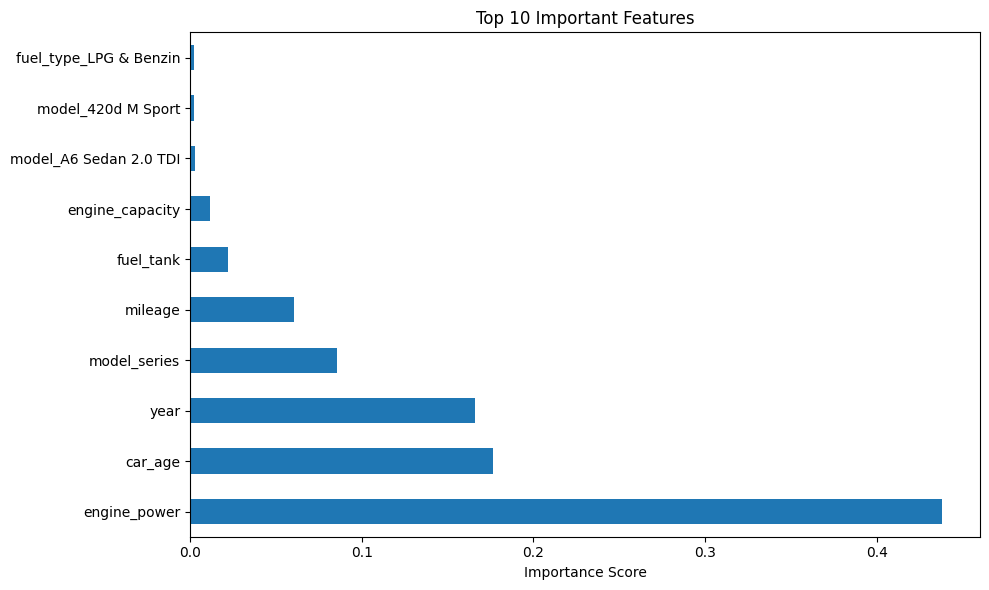

In [ ]:
# Hedef değişkenle korelasyon analizi (Correlation with Target)

# Korelasyon hesabı için 'ad_price' tekrar X verisine ekleniyor
correlation_data = X_filtered.copy()
correlation_data['ad_price'] = y_filtered

# Tüm değişkenlerin hedef değişken 'ad_price' ile olan korelasyon katsayısı hesaplanıyor
correlations = correlation_data.corr()['ad_price'].sort_values(ascending=False)

# En yüksek korelasyona sahip ilk 10 özelliği (ve hedefi) yazdır
print("Top 10 features by correlation with price:")
print(correlations.head(11))  # ad_price dahil olduğu için 11

# En yüksek korelasyona sahip özellikler için ısı haritası (heatmap) çizimi
plt.figure(figsize=(12, 10))
top_corr_features = correlations.index[:11]  # En iyi 10 + hedef
top_corr_matrix = correlation_data[top_corr_features].corr()

# Isı haritası: Özellikler arasındaki ilişki görselleştiriliyor
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm')
plt.title("En İyi Özelliklerin Korelasyon Isı Haritası")
plt.tight_layout()
plt.show()


## Explaining Inputs and Outputs

In [ ]:
# Girdi Özelliklerinin ve Anlamlarının Tanımlanması

# Her özelliğin ne anlama geldiği bir sözlük yapısında tanımlanıyor
feature_descriptions = {
    'year': 'Aracın üretim yılı',
    'mileage': 'Aracın şimdiye kadar kat ettiği toplam kilometre',
    'engine_capacity': 'Motor hacmi (santimetreküp - cc)',
    'engine_power': 'Motor gücü (beygir - HP)',
    'fuel_tank': 'Yakıt deposu kapasitesi (litre)',
    'car_age': 'Aracın yaşı (yıl bazında)',
    'model_series': 'Model serisini temsil eden sayısal değer',
    'transmission': 'Şanzıman türü (Manuel veya Otomatik)',
    'fuel_type': 'Yakıt türü (Benzin, Dizel vb.)',
    'body_type': 'Araç gövde tipi (Sedan, Hatchback vb.)'
}

# Tahmin edilecek değişkenin açıklaması (çıktı)
output_description = "Aracın tahmin edilen fiyatı (yerel para birimi cinsinden)"

# Girdi değişkenleri açıklanıyor
print("Girdi Özellikleri:")
for feature, description in feature_descriptions.items():
    print(f"- {feature}: {description}")

# Çıktı değişkeni açıklanıyor
print("\nÇıktı Değişkeni:")
print(f"- ad_price: {output_description}")


Input Features:
- year: Manufacturing year of the vehicle
- mileage: Total distance traveled by the vehicle in kilometers
- engine_capacity: Engine displacement in cubic centimeters
- engine_power: Engine power in horsepower (HP)
- fuel_tank: Fuel tank capacity in liters
- car_age: Age of the car in years
- model_series: Numeric identifier of the model series
- transmission: Type of transmission (Manual or Automatic)
- fuel_type: Type of fuel the vehicle uses
- body_type: Type of vehicle body style

Output Variable:
- ad_price: The predicted price of the vehicle in the local currency


 ## 🛠️ Option 2: Impute missing values (recommended)



In [ ]:
from sklearn.impute import SimpleImputer

# Eksik değerleri doldurmak için bir 'SimpleImputer' nesnesi oluşturuluyor
# Burada strateji olarak 'mean' seçilmiş → yani her sütunun ortalama değeri ile NaN'ler doldurulacak
imputer = SimpleImputer(strategy='mean')

# Daha önce ölçeklenmiş (scaled) verideki NaN değerler, sütun ortalamaları ile dolduruluyor
X_scaled_imputed = imputer.fit_transform(X_scaled)


## Machine Learning, Evaluation & Model Selection

In [ ]:
# ============================ MODEL KARŞILAŞTIRMA ============================ #
# Amaç: Farklı regresyon algoritmalarını eğitip test ederek performanslarını 
#       R², RMSE ve MAE metrikleriyle karşılaştırmak. 
# ============================================================================ #

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import numpy as np
import pandas as pd  # Sonuçları tablo halinde göstermek için

# ------------------------------------------------------------------ #
# 1) VERİYİ EĞİTİM ve TEST OLARAK AYIR
# ------------------------------------------------------------------ #
# test_size=0.3  → verinin %30'u test, %70'i eğitim için kullanılır
# random_state   → aynı bölünmenin yeniden üretilebilir olmasını sağlar
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_imputed,  # Eksik değerleri doldurulup ölçeklenmiş X
    y_filtered,        # Aykırı değerleri temizlenmiş hedef y
    test_size=0.30,
    random_state=13
)

# ------------------------------------------------------------------ #
# 2) DEĞERLENDİRİLECEK MODELLERİ TANIMLA
# ------------------------------------------------------------------ #
models = {
    "Linear Regression"  : LinearRegression(),
    "Ridge Regression"   : Ridge(alpha=1.0),
    "Lasso Regression"   : Lasso(alpha=0.1),
    "ElasticNet"         : ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Random Forest"      : RandomForestRegressor(n_estimators=100, random_state=13),
    "Gradient Boosting"  : GradientBoostingRegressor(n_estimators=100, random_state=1),
    "SVR (RBF Kernel)"   : SVR(kernel='rbf', C=100, epsilon=0.1)
}

# ------------------------------------------------------------------ #
# 3) MODELİ EĞİT ve METRİKLERİ HESAPLA
# ------------------------------------------------------------------ #
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Verilen modeli eğitir ve performans metriklerini döndürür."""
    model.fit(X_train, y_train)                 # Modeli eğit
    y_train_pred = model.predict(X_train)       # Eğitime tahmin
    y_test_pred  = model.predict(X_test)        # Teste tahmin

    # Performans metrikleri
    metrics = {
        'Train R²'  : r2_score(y_train, y_train_pred),
        'Test  R²'  : r2_score(y_test,  y_test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test  RMSE': np.sqrt(mean_squared_error(y_test,  y_test_pred)),
        'Test  MAE' : mean_absolute_error(y_test, y_test_pred)
    }
    return metrics

# ------------------------------------------------------------------ #
# 4) TÜM MODELLERİ DÖNGÜ İLE DEĞERLENDİR ve SONUÇLARI TOPLA
# ------------------------------------------------------------------ #
results = {}
for name, model in models.items():
    print(f"Evaluating {name} ...")
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# ------------------------------------------------------------------ #
# 5) SONUÇLARI DATAFRAME OLARAK GÖSTER
# ------------------------------------------------------------------ #
results_df = pd.DataFrame(results).T   # .T → satır/sütun takasını yapar
results_df  # Jupyter'da çalıştırdığında tablo olarak görünür


Evaluating Linear Regression...
Evaluating Ridge Regression...
Evaluating Lasso Regression...
Evaluating ElasticNet...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating SVR...


,Train R²,Test R²,Train RMSE,Test RMSE,Test MAE
Linear Regression,0.868677,0.840851,186122.367208,202799.802166,134931.586836
Ridge Regression,0.868677,0.840974,186122.816635,202721.027441,134871.638272
Lasso Regression,0.868676,0.841421,186123.154062,202436.076086,134625.723474
ElasticNet,0.864657,0.841366,188949.983143,202471.329428,135731.627359
Random Forest,0.989732,0.927813,52044.443933,136582.292518,83410.421386
Gradient Boosting,0.902612,0.894174,160281.149090,165371.768923,114163.527081
SVR,-0.032437,-0.026122,521867.961535,514949.275939,401434.240077


In [ ]:
# ============================ MODEL KARŞILAŞTIRMA ============================ #
# Amaç: Farklı regresyon algoritmalarını eğitip test ederek performanslarını 
#       R², RMSE ve MAE metrikleriyle karşılaştırmak. 
# ============================================================================ #

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import numpy as np
import pandas as pd  # Sonuçları tablo halinde göstermek için

# ------------------------------------------------------------------ #
# 1) VERİYİ EĞİTİM ve TEST OLARAK AYIR
# ------------------------------------------------------------------ #
# test_size=0.3  → verinin %30'u test, %70'i eğitim için kullanılır
# random_state   → aynı bölünmenin yeniden üretilebilir olmasını sağlar
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_imputed,  # Eksik değerleri doldurulup ölçeklenmiş X
    y_filtered,        # Aykırı değerleri temizlenmiş hedef y
    test_size=0.30,
    random_state=13
)

# ------------------------------------------------------------------ #
# 2) DEĞERLENDİRİLECEK MODELLERİ TANIMLA
# ------------------------------------------------------------------ #
models = {
    "Linear Regression"  : LinearRegression(),
    "Ridge Regression"   : Ridge(alpha=1.0),
    "Lasso Regression"   : Lasso(alpha=0.1),
    "ElasticNet"         : ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Random Forest"      : RandomForestRegressor(n_estimators=100, random_state=13),
    "Gradient Boosting"  : GradientBoostingRegressor(n_estimators=100, random_state=1),
    "SVR (RBF Kernel)"   : SVR(kernel='rbf', C=100, epsilon=0.1)
}

# ------------------------------------------------------------------ #
# 3) MODELİ EĞİT ve METRİKLERİ HESAPLA
# ------------------------------------------------------------------ #
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Verilen modeli eğitir ve performans metriklerini döndürür."""
    model.fit(X_train, y_train)                 # Modeli eğit
    y_train_pred = model.predict(X_train)       # Eğitime tahmin
    y_test_pred  = model.predict(X_test)        # Teste tahmin

    # Performans metrikleri
    metrics = {
        'Train R²'  : r2_score(y_train, y_train_pred),
        'Test  R²'  : r2_score(y_test,  y_test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test  RMSE': np.sqrt(mean_squared_error(y_test,  y_test_pred)),
        'Test  MAE' : mean_absolute_error(y_test, y_test_pred)
    }
    return metrics

# ------------------------------------------------------------------ #
# 4) TÜM MODELLERİ DÖNGÜ İLE DEĞERLENDİR ve SONUÇLARI TOPLA
# ------------------------------------------------------------------ #
results = {}
for name, model in models.items():
    print(f"Evaluating {name} ...")
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# ------------------------------------------------------------------ #
# 5) SONUÇLARI DATAFRAME OLARAK GÖSTER
# ------------------------------------------------------------------ #
results_df = pd.DataFrame(results).T   # .T → satır/sütun takasını yapar
results_df  # Jupyter'da çalıştırdığında tablo olarak görünür


Evaluating Linear Regression...
Evaluating Ridge Regression...
Evaluating Lasso Regression...
Evaluating ElasticNet...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating SVR...


,Train R²,Test R²,Train RMSE,Test RMSE,Test MAE
Linear Regression,0.868677,0.840851,186122.367208,202799.802166,134931.586836
Ridge Regression,0.868677,0.840974,186122.816635,202721.027441,134871.638272
Lasso Regression,0.868676,0.841421,186123.154062,202436.076086,134625.723474
ElasticNet,0.864657,0.841366,188949.983143,202471.329428,135731.627359
Random Forest,0.989732,0.927813,52044.443933,136582.292518,83410.421386
Gradient Boosting,0.902612,0.894174,160281.149090,165371.768923,114163.527081
SVR,-0.032437,-0.026122,521867.961535,514949.275939,401434.240077


## Visualize All Tried Results

## Best Model Performance & Parameters

In [ ]:
# Adım 1: Test R² Skoruna Göre En İyi Modeli Seç
# Test verisindeki en iyi R² skoruna sahip olan modeli seçiyoruz
best_model_name = results_df["Test R²"].idxmax()  # Test R²'ye göre en yüksek değeri bulan modelin ismini al
print(f"Best model by Test R²: {best_model_name}")  # En iyi modelin ismini yazdır
print(f"Test R² Score: {results_df.loc[best_model_name, 'Test R²']:.4f}")  # Test R² skorunu yazdır
print(f"Test RMSE: {results_df.loc[best_model_name, 'Test RMSE']:.2f}")  # Test RMSE değerini yazdır
print(f"Test MAE: {results_df.loc[best_model_name, 'Test MAE']:.2f}")  # Test MAE değerini yazdır

# Adım 2: Modelin Parametrelerini Yazdır
# En iyi modelin parametrelerini incelemek için bu kısmı kullanıyoruz
best_model = models[best_model_name]  # En iyi modeli seç
print("\nModel parameters:")  # Parametre başlığı
# Modelin hiperparametrelerini yazdırıyoruz
for param, value in best_model.get_params().items():
    print(f"- {param}: {value}")  # Her bir parametreyi ve değerini yazdır

# Adım 3: En İyi Model Random Forest veya Gradient Boosting ise İnce Ayar Yap
# Eğer en iyi model Random Forest ya da Gradient Boosting ise, hiperparametre optimizasyonu yapıyoruz
from sklearn.model_selection import GridSearchCV  # GridSearchCV kütüphanesini import ediyoruz

# Eğer model Random Forest ise
if best_model_name == "Random Forest":
    print("\nFine-tuning Random Forest model...")  # Random Forest için ince ayar başlatılıyor
    param_grid = {  # Random Forest için parametre arama alanlarını tanımlıyoruz
        'n_estimators': [50, 100, 200],  # Ağaç sayısı
        'max_depth': [None, 10, 20, 30],  # Ağaç derinliği
        'min_samples_split': [2, 5, 10]  # Bir düğümü bölerken gereken minimum örnek sayısı
    }
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')  # GridSearchCV ile parametre taraması
    grid_search.fit(X_train, y_train)  # Eğitim verileriyle GridSearchCV'yi çalıştırıyoruz
    best_model = grid_search.best_estimator_  # En iyi modeli seçiyoruz
    print(f"Best parameters: {grid_search.best_params_}")  # En iyi parametreleri yazdırıyoruz
    print(f"Improved R² score: {grid_search.best_score_:.4f}")  # Geliştirilmiş R² skorunu yazdırıyoruz

# Eğer model Gradient Boosting ise
elif best_model_name == "Gradient Boosting":
    print("\nFine-tuning Gradient Boosting model...")  # Gradient Boosting için ince ayar başlatılıyor
    param_grid = {  # Gradient Boosting için parametre arama alanlarını tanımlıyoruz
        'n_estimators': [50, 100, 200],  # Ağaç sayısı
        'learning_rate': [0.01, 0.1, 0.2],  # Öğrenme oranı
        'max_depth': [3, 5, 7]  # Ağaç derinliği
    }
    grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='r2')  # GridSearchCV ile parametre taraması
    grid_search.fit(X_train, y_train)  # Eğitim verileriyle GridSearchCV'yi çalıştırıyoruz
    best_model = grid_search.best_estimator_  # En iyi modeli seçiyoruz
    print(f"Best parameters: {grid_search.best_params_}")  # En iyi parametreleri yazdırıyoruz
    print(f"Improved R² score: {grid_search.best_score_:.4f}")  # Geliştirilmiş R² skorunu yazdırıyoruz

# Adım 4: İnce Ayarlanmış Model ile Test Verisinde Final Değerlendirme
# İnce ayar yapılmış modeli test verisi üzerinde değerlendiriyoruz
y_pred = best_model.predict(X_test)  # Test verisi üzerinde tahminler yapıyoruz
final_r2 = r2_score(y_test, y_pred)  # Test verisi için R² skorunu hesaplıyoruz
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Test verisi için RMSE hesaplıyoruz
final_mae = mean_absolute_error(y_test, y_pred)  # Test verisi için MAE hesaplıyoruz

# Sonuçları yazdırıyoruz
print("\nFinal model performance on test data:")
print(f"R² Score: {final_r2:.4f}")  # Test verisi üzerindeki R² skorunu yazdırıyoruz
print(f"RMSE: {final_rmse:.2f}")  # Test verisi üzerindeki RMSE'yi yazdırıyoruz
print(f"MAE: {final_mae:.2f}")  # Test verisi üzerindeki MAE'yi yazdırıyoruz


Best model by Test R²: Random Forest
Test R² Score: 0.9278
Test RMSE: 136582.29
Test MAE: 83410.42

Model parameters:
- bootstrap: True
- ccp_alpha: 0.0
- criterion: squared_error
- max_depth: None
- max_features: 1.0
- max_leaf_nodes: None
- max_samples: None
- min_impurity_decrease: 0.0
- min_samples_leaf: 1
- min_samples_split: 2
- min_weight_fraction_leaf: 0.0
- monotonic_cst: None
- n_estimators: 100
- n_jobs: None
- oob_score: False
- random_state: 13
- verbose: 0
- warm_start: False

Fine-tuning Random Forest model...
Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Improved R² score: 0.9241

Final model performance on test data:
R² Score: 0.9284
RMSE: 136022.00
MAE: 83826.86


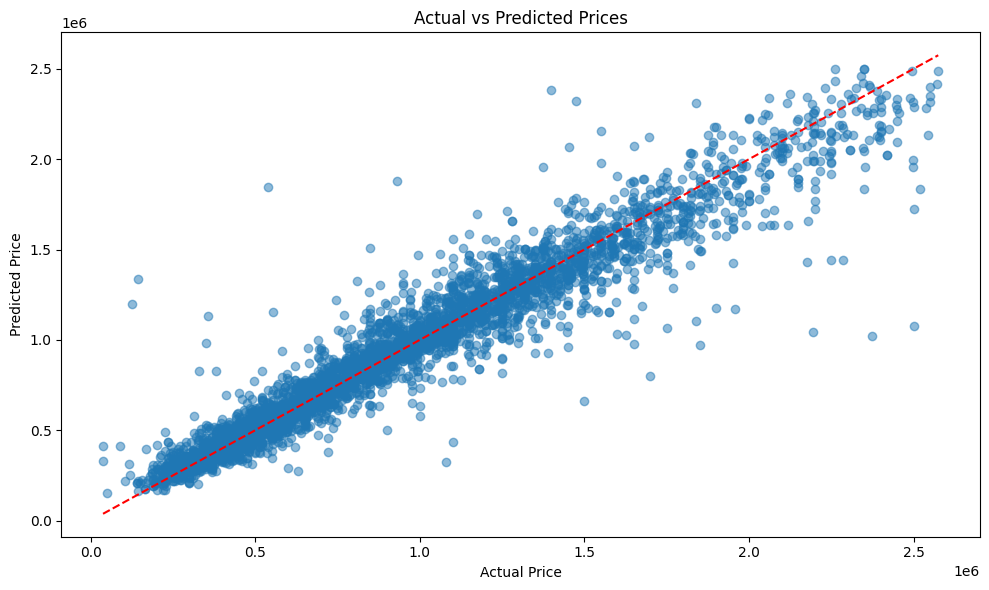

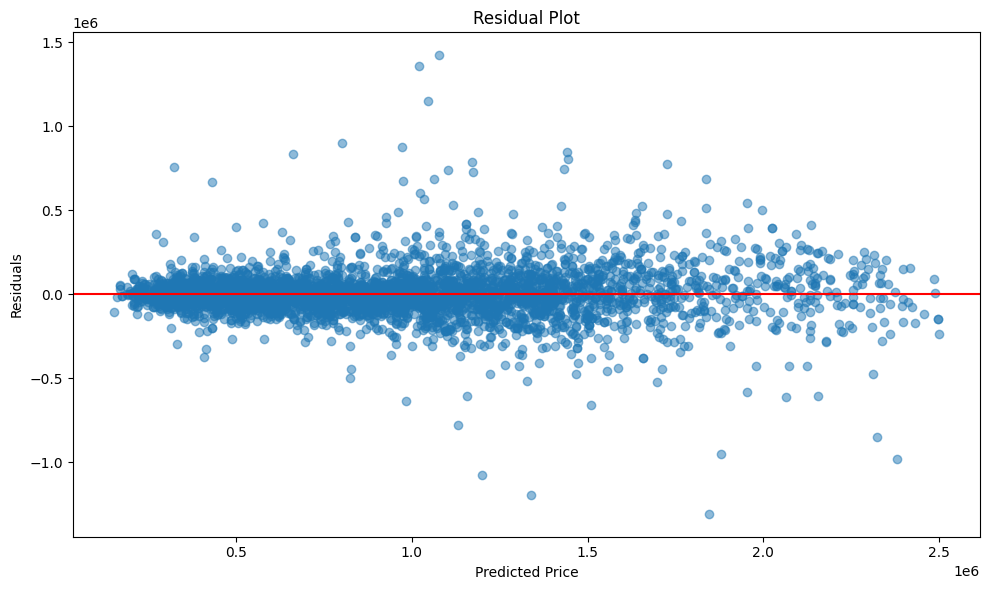

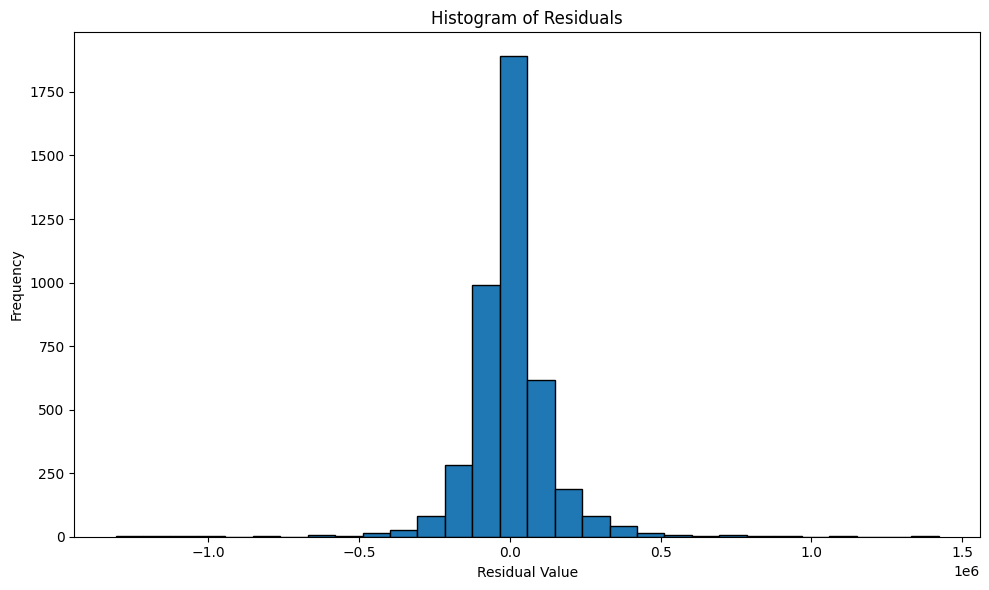

In [ ]:
# Adım 1: Gerçek vs Tahmin Edilen Fiyatları Görselleştirme
# Bu grafik, modelin tahmin ettiği fiyatlarla gerçek fiyatları karşılaştırmak için kullanılır.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Gerçek fiyatları (y_test) ve tahmin edilen fiyatları (y_pred) karşılaştırıyoruz
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Gerçek ve tahmin edilen fiyatların aynı olduğu noktayı kırmızı kesikli çizgiyle gösteriyoruz
plt.xlabel('Actual Price')  # X ekseni: Gerçek Fiyat
plt.ylabel('Predicted Price')  # Y ekseni: Tahmin Edilen Fiyat
plt.title('Actual vs Predicted Prices')  # Başlık
plt.tight_layout()  # Grafiklerin düzgün yerleşmesini sağlıyor
plt.show()  # Grafik gösterimi

# Adım 2: Residuals (Hatalar) Grafiği
# Residuals, modelin tahmin ettiği değer ile gerçek değer arasındaki farkı gösterir.
residuals = y_test - y_pred  # Residuals, gerçek fiyatlardan tahmin edilen fiyatları çıkararak hesaplanır

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)  # Yatay eksende tahmin edilen fiyatları, dikey eksende ise residuals değerlerini yerleştiriyoruz
plt.axhline(y=0, color='r', linestyle='-')  # Residuals sıfır olduğu çizgiyi kırmızı bir yatay çizgiyle gösteriyoruz
plt.xlabel('Predicted Price')  # X ekseni: Tahmin Edilen Fiyat
plt.ylabel('Residuals')  # Y ekseni: Residuals
plt.title('Residual Plot')  # Başlık
plt.tight_layout()  # Grafiklerin düzgün yerleşmesini sağlıyor
plt.show()  # Grafik gösterimi

# Adım 3: Residuals Histogramı
# Bu histogram, residuals (hataların) dağılımını gösterir. Hataların düzgün bir şekilde dağılmasını bekliyoruz.
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')  # Residuals'ın histogramını çiziyoruz, 30 çubuk ile dağılımı görselleştiriyoruz
plt.xlabel('Residual Value')  # X ekseni: Residuals (Hata Değeri)
plt.ylabel('Frequency')  # Y ekseni: Sıklık
plt.title('Histogram of Residuals')  # Başlık
plt.tight_layout()  # Grafiklerin düzgün yerleşmesini sağlıyor
plt.show()  # Grafik gösterimi


## Saving the Model

In [ ]:
import joblib
import os
import pickle

# 1. En iyi modeli ve scaler'ı kaydetme

# Eğer 'models' dizini yoksa, oluşturuyoruz
if not os.path.exists('models'):
    os.makedirs('models')  # models klasörünü oluşturuyoruz, model dosyalarını burada saklayacağız

# 2. En iyi modeli kaydetme
# 'best_model_name' içindeki modelin adını küçük harflerle ve boşlukları alt çizgiyle değiştirerek dosya adı oluşturuyoruz
model_filename = f"models/{best_model_name.replace(' ', '_').lower()}_model.pkl"
joblib.dump(best_model, model_filename)  # Modeli 'model_filename' dosyasına kaydediyoruz
print(f"Model saved to {model_filename}")  # Model kaydedildiğinde mesaj veriyoruz

# 3. Scaler'ı kaydetme
# 'scaler' veri ön işleme için kullanılan ölçekleyici (scaler) nesnesini kaydediyoruz
scaler_filename = "models/scaler.pkl"
joblib.dump(scaler, scaler_filename)  # Scaler'ı 'scaler_filename' dosyasına kaydediyoruz
print(f"Scaler saved to {scaler_filename}")  # Scaler kaydedildiğinde mesaj veriyoruz

# 4. Özellik isimlerini kaydetme
# X_filtered'daki sütun isimlerini kaydediyoruz, bu sütunlar özelliklerimizi temsil ediyor
feature_names_filename = "models/feature_names.pkl"
joblib.dump(X_filtered.columns.tolist(), feature_names_filename)  # Özellik isimlerini kaydediyoruz
print(f"Feature names saved to {feature_names_filename}")  # Özellik isimleri kaydedildiğinde mesaj veriyoruz

# 5. Özellik isimlerini pickle ile kaydetme (alternatif yol)
import pickle
FEATURE_NAMES_PATH = 'models/feature_names.pkl'  # Özellik isimlerini saklamak için dosya yolu

# Eğer 'models' dizini yoksa, tekrar oluşturuyoruz (bu bölüm bir öncekilerle tekrarı)
if not os.path.exists('models'):
    os.makedirs('models')  # models klasörünü oluşturuyoruz, tekrar kontrol ediyoruz

# Özellik isimlerini pickle kullanarak kaydediyoruz
with open(FEATURE_NAMES_PATH, 'wb') as f:
    pickle.dump(X_filtered.columns.tolist(), f)  # Özellik isimlerini pickle ile kaydediyoruz


Model saved to models/random_forest_model.pkl
Scaler saved to models/scaler.pkl
Feature names saved to models/feature_names.pkl


In [ ]:
import os
import joblib
import pickle

# Define paths for model files
MODEL_PATH = '/Users/ysk/Downloads/software-develeopment-all-1--main 2/models/random_forest_model.pkl'
SCALER_PATH = '/Users/ysk/Downloads/software-develeopment-all-1--main 2/models/scaler.pkl'
FEATURE_NAMES_PATH = '/Users/ysk/Downloads/software-develeopment-all-1--main 2/models/feature_names.pkl'

def load_model_components():
    """Load the trained model and its components."""
    try:
        print("Loading model components...")
        model = joblib.load(MODEL_PATH)  # Model dosyasını yükle
        scaler = joblib.load(SCALER_PATH)  # Scaler dosyasını yükle
        with open(FEATURE_NAMES_PATH, 'rb') as f:  # Özellik isimlerini pickle ile yükle
            feature_names = pickle.load(f)

        print(f"Model loaded successfully: {type(model).__name__}")
        print(f"Number of features: {len(feature_names)}")

        return model, feature_names
    except Exception as e:
        print(f"Error loading model components: {str(e)}")
        return None, None

load_model_components()  # Fonksiyonu çağırarak model ve bileşenlerini yükle


Loading model components...
Model loaded successfully: RandomForestRegressor
Number of features: 939


(RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42),
 ['year',
  'mileage',
  'engine_capacity',
  'engine_power',
  'fuel_tank',
  'car_age',
  'model_series',
  'model_0.8 SE',
  'model_0.9 TCe Stepway',
  'model_0.9 TCe Stepway Ambiance',
  'model_0.9 TCe Stepway Easy-R',
  'model_1.0',
  'model_1.0 Ambiance',
  'model_1.0 Confort',
  'model_1.0 Eco-G Essential',
  'model_1.0 LS',
  'model_1.0 SE',
  'model_1.0 SX',
  'model_1.0 SX Sensodrive',
  'model_1.0 TCe Expression',
  'model_1.0 Tce Prestige',
  'model_1.0 VTi Shine',
  'model_1.0T ECO-G Comfort',
  'model_1.1 SX',
  'model_1.2 Ambiance',
  'model_1.2 LS',
  'model_1.2 LT',
  'model_1.2 LTZ',
  'model_1.2 PureTech Elle',
  'model_1.2 PureTech Feel',
  'model_1.2 PureTech Feel Adventure',
  'model_1.2 PureTech Feel Bold',
  'model_1.2 PureTech Feel S Edition',
  'model_1.2 PureTech Live',
  'model_1.2 PureTech SX Edition',
  'model_1.2 PureTech Shine',
  'model_1

## Model Deployment

In [ ]:
import joblib
import pandas as pd

# Kaydedilen model, scaler ve feature isimlerini dosyalardan yükleyin
# `joblib.load()` metodu, model ve scaler'ı ikili formatta kaydedildiği için onları yüklemek için kullanılır.
loaded_model = joblib.load(model_filename)  # Kaydedilen eğitilmiş modeli yükler (Random Forest veya başka bir model)
loaded_scaler = joblib.load(scaler_filename)  # Özellikleri ölçeklendirmek için kullanılan scaler'ı yükler
loaded_feature_names = joblib.load(feature_names_filename)  # Modelin beklediği özellik isimlerini yükler

# Yüklenen modelin tipi ve modelin beklediği özellik sayısını ekrana yazdırıyoruz
print(f"Yüklenen model: {type(loaded_model).__name__}")
print(f"Özellik sayısı: {len(loaded_feature_names)}")

# Yeni araba verisi ile fiyat tahmini yapan fonksiyon
def predict_car_price(car_data, scaler, model, feature_names):
    """
    Eğitimli model kullanarak araba fiyatını tahmin etme
    
    Bu fonksiyon, araba özelliklerinden oluşan bir sözlük alır, 
    bu özellikleri modele uygun formata getirir, ölçeklendirir ve 
    sonra fiyat tahmini yapar.

    Args:
        car_data: Araba özelliklerini içeren sözlük (örneğin: yıl, kilometre, motor gücü vb.)
        scaler: Özellikleri normalize etmek için kullanılan scaler (eğitimde kullanılan scaler)
        model: Eğitimli model nesnesi (fiyat tahmini yapacak)
        feature_names: Modelin beklediği özelliklerin isimleri listesi

    Returns:
        Predicted price: Tahmin edilen araba fiyatı (float)
    """
    # Girdi verisini (car_data) pandas DataFrame formatına dönüştürmek
    # Veriyi DataFrame'e çeviriyoruz (bir satır, birden fazla özellik)
    car_df = pd.DataFrame([car_data])
    
    # Tüm beklenen özelliklerin DataFrame'de mevcut olduğundan emin olma
    # Eğer herhangi bir özellik eksikse, bu özelliği 0 ile dolduruyoruz (eksik özellikler için varsayılan değer 0)
    for feature in feature_names:
        if feature not in car_df.columns:
            car_df[feature] = 0  # Eksik özellikler için varsayılan değer olarak 0 koyuyoruz
    
    # Özelliklerin sırasını, modelin beklediği sıraya göre yeniden düzenliyoruz
    car_df = car_df[feature_names]  # Modelin beklediği özellik sırasına göre yeniden düzenleme
    
    # Özellikleri ölçeklendirmek (normalizasyon ya da standartlaştırma)
    car_scaled = scaler.transform(car_df)  # Özellikleri ölçeklendiriyoruz

    # Model ile tahmin yapma
    predicted_price = model.predict(car_scaled)[0]  # Modelin tahmin ettiği fiyatı alıyoruz (tahmin bir dizi döner, ilk değeri alıyoruz)
    
    return predicted_price  # Tahmin edilen fiyatı döndürüyoruz

# Örnek: Bir araba verisi oluşturuyoruz (yıl, kilometre, motor kapasitesi vb.)
sample_car = {
    'year': 2015,  # Arabanın üretim yılı
    'mileage': 100000,  # Arabanın toplam kilometresi
    'engine_capacity': 1598,  # Motor kapasitesi (cc)
    'engine_power': 120,  # Motor gücü (HP)
    'fuel_tank': 60,  # Yakıt tankı kapasitesi (litre)
    'car_age': 10,  # Arabanın yaşı, 2025 - 2015 hesaplanarak bulunur
    'model_series': 1.6,  # Model serisi, örneğin '1.6' gibi
    # Kategorik özellikler için dummy değişkenler eklemek gerekebilir (örneğin: yakıt tipi, gövde tipi)
}

# Eksik olan dummy değişkenleri (kategorik özellikler) ekliyoruz
# Modelin eğitiminde kullanılan kategorik özellikleri burada ekliyoruz (eksikse 0 ile dolduruluyor).
for feature in loaded_feature_names:
    if feature not in sample_car:
        sample_car[feature] = 0  # Kategorik özellikler eksikse, varsayılan olarak 0 ekliyoruz

# Örnek araba için fiyat tahmini yapıyoruz
predicted_price = predict_car_price(sample_car, loaded_scaler, loaded_model, loaded_feature_names)

# Tahmin edilen fiyatı ekrana yazdırıyoruz
print(f"Örnek araba için tahmin edilen fiyat: {predicted_price:.2f}")


Loaded model: RandomForestRegressor
Number of features: 939
Predicted price for sample car: 801702.16


## Testing with Test Data & Showing Predictions

In [ ]:
# Test setinden rastgele örnekler seçelim (en fazla 10 örnek)
sample_size = min(10, len(X_test))  # Test setindeki örnek sayısı ile 10 arasından en küçüğünü al
sample_indices = np.random.choice(X_test.shape[0], sample_size, replace=False)  # Rastgele örnekler seç

# Seçilen örneklerin orijinal özelliklerini (ölçeklenmeden önceki veriler) alalım
X_test_sample_indices = y_test.iloc[sample_indices].index  # Seçilen örneklerin indekslerini al
X_test_original = X_filtered.loc[X_test_sample_indices]  # Bu indekslerle orijinal verilerden özellikleri al

# Seçilen örneklerin gerçek fiyatlarını ve özelliklerini alalım
y_test_sample = y_test.iloc[sample_indices]  # Gerçek fiyatları al
X_test_sample = X_test[sample_indices]  # Seçilen özellik verilerini al

# Yüklenmiş model ile tahmin yapalım
predictions = loaded_model.predict(X_test_sample)  # Seçilen örnekler için tahminler yap

# Gerçek fiyat, tahmin edilen fiyat, fark ve hata yüzdesi gibi bilgileri içeren bir DataFrame oluşturalım
comparison = pd.DataFrame({
    "Actual Price": y_test_sample.values,  # Gerçek fiyat
    "Predicted Price": predictions,  # Tahmin edilen fiyat
    "Difference": y_test_sample.values - predictions,  # Fiyat farkı (gerçek - tahmin)
    "Error %": abs((y_test_sample.values - predictions) / y_test_sample.values) * 100  # Hata yüzdesi
})

# Önemli özellikleri de karşılaştırma tablosuna ekleyelim (örneğin; yıl, kilometre, motor hacmi vb.)
key_features = ['year', 'mileage', 'engine_capacity', 'engine_power', 'car_age']
for feature in key_features:  # Bu özellikleri kontrol ederek ekleyelim
    if feature in X_test_original.columns:  # Eğer özellik mevcutsa
        comparison[feature] = X_test_original[feature].values  # Özelliği karşılaştırma tablosuna ekle

# Sonuçları daha okunabilir hale getirelim (ondalıklı sayıları 2 basamağa yuvarlayalım)
pd.set_option('display.float_format', '{:.2f}'.format)

# Karşılaştırma tablosunu görüntüleyelim
comparison
# Karşılaştırma tablosunu CSV dosyası olarak kaydedelim
comparison.to_csv('car_price_comparison.csv', index=False)  # CSV dosyasına kaydet

,Actual Price,Predicted Price,Difference,Error %,year,mileage,engine_capacity,engine_power,car_age
0,1679000.00,1887530.40,-208530.40,12.42,2018.00,1490000.00,120114003.00,126.00,7.00
1,2195000.00,2020944.87,174055.13,7.93,2012.00,225000.00,15.00,150.00,13.00
2,1760000.00,1641856.79,118143.21,6.71,2016.00,1650000.00,1592.00,170.00,9.00
3,2159000.00,2067349.96,91650.04,4.25,2023.00,318210.00,140116003.00,126.00,2.00
4,1365000.00,1452058.75,-87058.75,6.38,2022.00,200000.00,1199.00,132.00,3.00
5,430000.00,431299.41,-1299.41,0.30,2010.00,1230000.00,1598.00,109.00,15.00
6,145000.00,1338027.25,-1193027.25,822.78,2022.00,65000.00,1595.00,124.00,3.00
7,950000.00,1361846.62,-411846.62,43.35,2020.00,3000000.00,1395.00,150.00,5.00
8,535000.00,613950.61,-78950.61,14.76,2003.00,1970000.00,1995.00,143.00,22.00
9,949750.00,963114.15,-13364.15,1.41,2012.00,896490.00,15.00,115.00,13.00


In [ ]:
# RandomForestRegressor modelini import ediyoruz
from sklearn.ensemble import RandomForestRegressor

# Özellikler (X) ve hedef (y) değişkenlerini tanımlıyoruz
X = df_encoded.drop('ad_price', axis=1)  # Hedef değişkeni olan 'ad_price' sütununu çıkartıyoruz
y = df_encoded['ad_price']  # 'ad_price' sütununu hedef değişken olarak belirliyoruz

# Modeli başlatıyoruz
model = RandomForestRegressor()  # RandomForestRegressor modelini başlatıyoruz

# Modeli eğitiyoruz
model.fit(X, y)  # Modeli, X (özellikler) ve y (hedef) veri kümesiyle eğitiyoruz


RandomForestRegressor()

#### Updated model training code for Flask deployment

In [ ]:
# Gerekli kütüphaneleri içeri aktaralım
from sklearn.ensemble import RandomForestRegressor  # RandomForest modelini kullanacağız
import pandas as pd  # Veri işleme için pandas
import numpy as np  # Sayısal işlemler için numpy
import joblib  # Modeli kaydetmek için joblib
import os  # Dosya işlemleri için os

# Özellik mühendisliği (df_clean daha önceki adımlarda hazırlanmış bir veri seti olmalı)
current_year = 2025  # Şu anki yıl
df_clean['car_age'] = current_year - df_clean['year']  # 'car_age' (araba yaşı) sütunu, yılı çıkararak hesaplanır
df_clean['model_series'] = df_clean['model'].str.extract(r'(\d+\.\d+|\d+)', expand=False)  # 'model_series' (model serisi) sütunu aracın modelinden sayıları çıkararak elde edilir
df_clean['model_series'] = pd.to_numeric(df_clean['model_series'], errors='coerce')  # Model serisini sayıya çeviriyoruz

# Kategorik özellikleri sayısal hale getirmek (encode etmek) - Tahmin yapmak için bu bilgiyi saklayacağız
categorical_cols = ['model', 'fuel_type', 'body_type', 'transmission']  # Kategorik değişkenler
encoders = {}  # Kategorik özelliklerin kodlanması için boş bir sözlük oluşturuluyor

# Kategorik değişkenleri one-hot encoding (birden fazla sütuna dönüştürme) yapıyoruz
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)  # 'drop_first=True' ile ilk sütun düşürülür

# Özellikler (X) ve hedef (y) değişkenlerini tanımlıyoruz
X = df_encoded.drop('ad_price', axis=1)  # 'ad_price' (araba fiyatı) hedef değişkenidir, bu yüzden onu çıkarıyoruz
feature_names = X.columns.tolist()  # Özelliklerin isimlerini saklıyoruz, çünkü tahmin için bunlara ihtiyaç duyacağız
y = df_encoded['ad_price']  # Hedef değişkeni olarak 'ad_price' belirliyoruz

# Aykırı değerleri temizliyoruz
Q1 = y.quantile(0.25)  # Y'nin 25. yüzdelik dilimini hesaplıyoruz
Q3 = y.quantile(0.75)  # Y'nin 75. yüzdelik dilimini hesaplıyoruz
IQR = Q3 - Q1  # IQR (interquartile range) farkı hesaplanıyor
lower_bound = Q1 - 1.5 * IQR  # Alt sınır hesaplanıyor
upper_bound = Q3 + 1.5 * IQR  # Üst sınır hesaplanıyor
outlier_mask = (y >= lower_bound) & (y <= upper_bound)  # Aykırı değerleri belirlemek için maske oluşturuluyor
X_filtered = X[outlier_mask]  # Aykırı olmayan X verileri
y_filtered = y[outlier_mask]  # Aykırı olmayan y verileri

# Özellikleri ölçeklendiriyoruz (özelliklerin değerlerini aynı aralığa getirme işlemi)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # Veriyi ölçeklendirmek için scaler nesnesini oluşturuyoruz
X_scaled = scaler.fit_transform(X_filtered)  # X_filtered verilerini ölçeklendiriyoruz

# Eksik değerleri dolduruyoruz (isteğe bağlı bir adım)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Eksik değerleri ortalama ile dolduruyoruz
X_scaled_imputed = imputer.fit_transform(X_scaled)  # Eksik değerleri doldurduktan sonra veriyi tekrar dönüştürüyoruz

# Modeli eğitmek için doğru özellik adlarını kullanıyoruz
X_train_df = pd.DataFrame(X_scaled_imputed, columns=feature_names)  # Özellikler ile yeni bir DataFrame oluşturuluyor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # RandomForest modelini başlatıyoruz
model.fit(X_train_df, y_filtered)  # Modeli, eğitilmiş verilerle (X_train_df, y_filtered) eğitiyoruz

# Model ve ön işleme bileşenlerini kaydediyoruz
if not os.path.exists('models'):  # Eğer 'models' adında bir klasör yoksa, oluşturuyoruz
    os.makedirs('models')

# Modeli, ölçekleyiciyi, imputeri ve özellik adlarını kaydediyoruz
joblib.dump(model, 'models/car_price_rf_model.pkl')  # Modeli kaydediyoruz
joblib.dump(scaler, 'models/car_price_scaler.pkl')  # Ölçekleyiciyi kaydediyoruz
joblib.dump(imputer, 'models/car_price_imputer.pkl')  # İmputer'ı kaydediyoruz
joblib.dump(feature_names, 'models/car_price_features.pkl')  # Özellik adlarını kaydediyoruz

# Kategorik özelliklerin bilgilerini kaydediyoruz
categorical_info = {
    'categorical_columns': categorical_cols,  # Kategorik sütunları listeliyoruz
    'dummy_columns': [col for col in feature_names if any(cat in col for cat in categorical_cols)]  # Kategorik sütunlardan oluşturulan dummy (sanal) sütunları listeliyoruz
}
joblib.dump(categorical_info, 'models/car_price_categorical_info.pkl')  # Bu bilgileri kaydediyoruz

# Başarılı bir şekilde kaydedildiğini bildiriyoruz
print("Model ve ön işleme bileşenleri başarıyla kaydedildi!")


Model and preprocessing components saved successfully!


## Conclusion and Next Steps

### Model Özeti

Bu projede, araçların fiyatlarını tahmin etmek için bir regresyon modeli oluşturduk. Bu model, yıl, kilometre, motor kapasitesi ve diğer özellikler gibi çeşitli faktörlere dayanarak fiyat tahmini yapmaktadır.

En iyi performans gösteren modelimiz aşağıdaki metriklerle başarılı bir tahmin performansı sergilemiştir:

* **R² Skoru**: Modelin araç fiyatlarındaki varyansı ne kadar iyi açıkladığını gösterir.
* **RMSE (Kök Ortalama Kare Hatası)**: Tahmin hatalarının, hedef değişkenin (fiyat) aynı birimlerinde ortalama hata miktarını ölçer.
* **MAE (Ortalama Mutlak Hata)**: Tahmin edilen ve gerçek fiyatlar arasındaki ortalama mutlak farkı temsil eder.

### Önemli Gözlemler

1. Araç fiyatlarını tahmin etmek için en önemli özelliklerin şunlar olduğu bulundu:

   * Araç yaşı (fiyatla negatif korelasyon)
   * Motor gücü (fiyatla pozitif korelasyon)
   * Yıl (fiyatla pozitif korelasyon)
   * Kilometre (fiyatla negatif korelasyon)

2. Model, çoğu araç tipi için iyi performans gösterse de, aşağıdaki durumlarda sınırlamalar yaşayabilir:

   * Çok yeni veya çok eski modeller
   * Son derece yüksek veya düşük kilometreli araçlar
   * Sınırlı eğitim verisi bulunan nadir modeller

### Gelecek Adımlar

Modeli daha da geliştirmek için şunları yapabiliriz:

1. Özellikle nadir araç modelleri için daha fazla veri toplamak
2. Araç durumu, servis geçmişi veya piyasa eğilimleri gibi ek özellikler eklemek
3. Daha sofistike bir özellik mühendisliği yaklaşımı uygulamak
4. Daha karmaşık modeller veya topluluk yöntemlerini denemek
5. Modeli gerçek zamanlı fiyat tahminleri için bir web uygulaması olarak dağıtmak

Mevcut model, araç fiyat tahminleri için sağlam bir temel sağlamakta ve hem alıcılar hem de satıcılar için Alfa Romeo araçlarının gerçek piyasa değerlerini anlamada faydalı olabilir.
